# **Gematria**

## [Riddler Classic](https://fivethirtyeight.com/features/can-you-find-a-number-worth-its-weight-in-letters/), Jan 10, 2020

### solution by [Laurent Lessard](https://laurentlessard.com)

> In Jewish study, “Gematria” is an alphanumeric code where words are assigned numerical values based on their letters. We can do the same in English, assigning 1 to the letter A, 2 to the letter B, and so on, up to 26 for the letter Z. The value of a word is then the sum of the values of its letters. For example, RIDDLER has an alphanumeric value of 70, since R + I + D + D + L + E + R becomes 18 + 9 + 4 + 4 + 12 + 5 + 18 = 70.
>
> But what about the values of different numbers themselves, spelled out as words? The number 1 (ONE) has an alphanumeric value of 15 + 14 + 5 = 34, and 2 (TWO) has an alphanumeric value of 20 + 23 + 15 = 58. Both of these values are bigger than the numbers themselves.
>
> Meanwhile, if we look at larger numbers, 1,417 (ONE THOUSAND FOUR HUNDRED SEVENTEEN) has an alphanumeric value of 379, while 3,140,275 (THREE MILLION ONE HUNDRED FORTY THOUSAND TWO HUNDRED SEVENTY FIVE) has an alphanumeric value of 718. These values are much smaller than the numbers themselves.
>
> If we consider all the whole numbers that are less than their alphanumeric value, what is the largest of these numbers?

---

# My Solution:

The approach is staightforward:
1. write a function to transform any number into its written representation
2. write a function to take any written representation and compute its alphanumeric ("Gematria") score
3. compute the scores of all numbers and pick the number whose score is as large as possible while being smaller than the number itself

In [1]:
from math import floor
from matplotlib import pyplot as plt

In [2]:
# mapping of each letter to its score and computing the score of a word (empty spaces worth zero)
letters = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letterscores = { lett:i for i,lett in enumerate(letters) }

def word_score(word):
    return sum( [letterscores[lett] for lett in word] )    

In [3]:
# here is an example of this at work:
word_score('RIDDLER')

70

In [4]:
# function that spells out a number (this one is a bit tedious!)
# I used a recursive implementation because that makes it easier to parse
def spell_number(n, spell_zero=True):
    
    # upper limit for our program
    assert(0 <= n < 10 ** 18)
    
    if spell_zero and n==0:
        return 'ZERO'
    
    if 0 <= n < 20:
        return ['','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE',
                'TEN','ELEVEN','TWELVE','THIRTEEN','FOURTEEN','FIFTEEN','SIXTEEN','SEVENTEEN','EIGHTEEN','NINETEEN'][n]
    
    if 20 <= n < 100:
        return ['TWENTY','THIRTY','FORTY','FIFTY','SIXTY','SEVENTY','EIGHTY','NINETY'][floor(n/10-2)] + ' ' + spell_number(n % 10, spell_zero=False)
    
    # prefix names (we could keep going...)
    numnames = [(2,'HUNDRED'),(3,'THOUSAND'),(6,'MILLION'),(9,'BILLION'),(12,'TRILLION'),(15,'QUADRILLION'),(18,'QUINTILLION')]
    
    for i in range(len(numnames)-1):
        low = 10 ** numnames[i][0]
        high = 10 ** numnames[i+1][0]
        if low <= n < high:
            return spell_number(floor(n/low)) + ' ' + numnames[i][1] + ' ' + spell_number(n % low, spell_zero=False)

def score(n):
    return word_score( spell_number(n) )   

In [5]:
# here are the examples from the problem statement:
# 2 (TWO) should have a value of 
# 1,417 (ONE THOUSAND FOUR HUNDRED SEVENTEEN) should have a value of 379
# 3,140,275 (THREE MILLION ONE HUNDRED FORTY THOUSAND TWO HUNDRED SEVENTY FIVE) should have a value of 718
ntest = [2, 1417, 3140275]
[(n, spell_number(n), score(n)) for n in ntest]

[(2, 'TWO', 58),
 (1417, 'ONE THOUSAND FOUR HUNDRED SEVENTEEN', 379),
 (3140275,
  'THREE MILLION ONE HUNDRED FORTY  THOUSAND TWO HUNDRED SEVENTY FIVE',
  718)]

In [6]:
# find the best answer (we go up to 10,000 but we don't need to go that high)
sc = [(n,score(n)) for n in range(10000)]
scred = [(n,v) for (n,v) in sc if n < v]
scred_sort = sorted(scred, key=lambda x: x[1], reverse=True)
best_val = tuple(scred_sort[0])

print(best_val)
print(spell_number(best_val[0]))

(277, 307)
TWO HUNDRED SEVENTY SEVEN


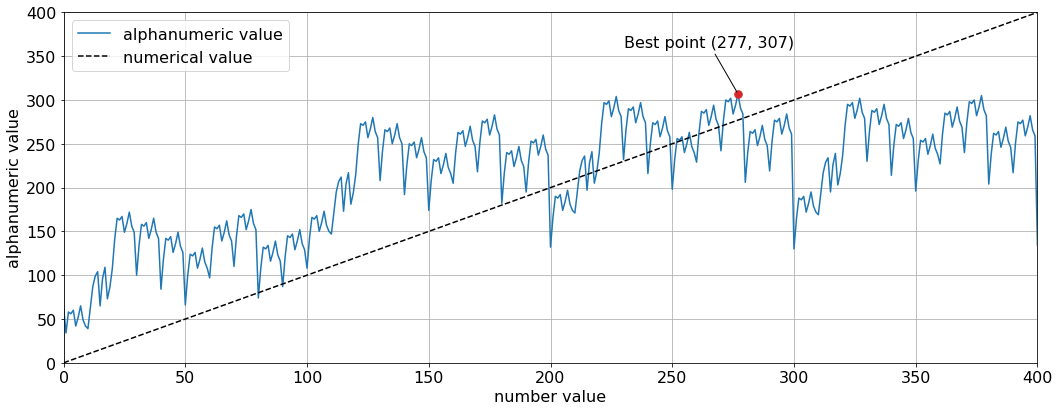

In [7]:
# Let's plot the results for the range up to 400 so we can see what we're working with
nvals = range(401)
vvals = [score(n) for n in nvals]

plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 16})

plt.plot( nvals, [score(n) for n in nvals])
plt.plot( nvals, nvals, 'k--' )
plt.plot( best_val[0], best_val[1], 'C3.', markersize=15)
plt.xlim([0,400])
plt.axis([0,400,0,400])
plt.grid()
plt.xlabel("number value")
plt.ylabel("alphanumeric value")
plt.annotate( "Best point " + str(best_val),
    best_val, (230,360),
    arrowprops=dict(arrowstyle = "-"), fontsize=16)
plt.legend(["alphanumeric value","numerical value"])

plt.tight_layout()
plt.savefig('gematria.png',bbox_inches='tight',pad_inches=0)